# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from collections import Counter
# Data split
from sklearn.model_selection import StratifiedKFold

# Preprocessing
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler


# Custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Custom Classifier
from imblearn import FunctionSampler
from sklearn.experimental import enable_halving_search_cv
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_array, check_is_fitted
from imblearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectPercentile, f_classif
from feature_engine.selection import DropCorrelatedFeatures
from sklearn.ensemble import BaggingClassifier

# Pipeline
from imblearn.pipeline import Pipeline

# Metrics 
from sklearn.metrics import brier_score_loss, roc_curve, precision_recall_curve 
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

# Feature Enginering
from sklearn.inspection import permutation_importance
import shap

from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
from sklearn import set_config
set_config(display="diagram")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings(action='ignore', category=FitFailedWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# Exploratory Data Analysis(EDA)

- Analysis of the features.

- Finding any relations or trends considering multiple features.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeckRoomService, FoodCourt, ShoppingMall, Spa, VRDeckRoomService, FoodCourt, ShoppingMall, Spa, VRDeck## train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Text(0.5, 1.0, 'Transported')

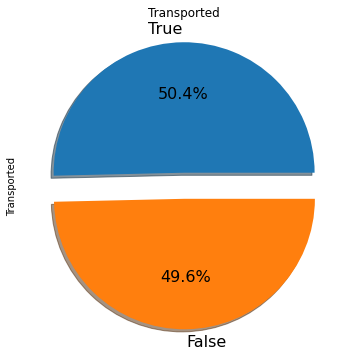

In [4]:
plt.figure(figsize=(6,6))
df.Transported.value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Transported")

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
##From https://www.kaggle.com/code/arootda/pycaret-visualization-optimization-0-81/notebook
from IPython.core.display import HTML

def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

multi_table([pd.DataFrame(df[i].value_counts()) for i in df.columns if i != "I'm serious this could be your ad here"])

,PassengerId
0001_01,1
6136_01,1
6141_01,1
6139_06,1
6139_05,1
...,...
3126_01,1
3124_03,1
3124_02,1
3124_01,1


### Missing data

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. [https://en.wikipedia.org/wiki/Missing_data]

In [8]:
# from https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013?versioned=true
from IPython.display import Image
Image(url = 'https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1', width=700)

- Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

- Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

- Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.

Wikipedia: https://en.wikipedia.org/wiki/Missing_data

Good guide

source: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python


#### Search null

In [9]:
def null_detector(df):
    # number of all null values in dataframe columns
    
    print(f'number of all null values in df columns')

    print("\n"f'{df.isnull().sum()}')

    # Nullity matrix to find null value in dataframe
    plt.figure(figsize=(15,10))
    sns.heatmap(df.isnull(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
    plt.show()

number of all null values in df columns

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


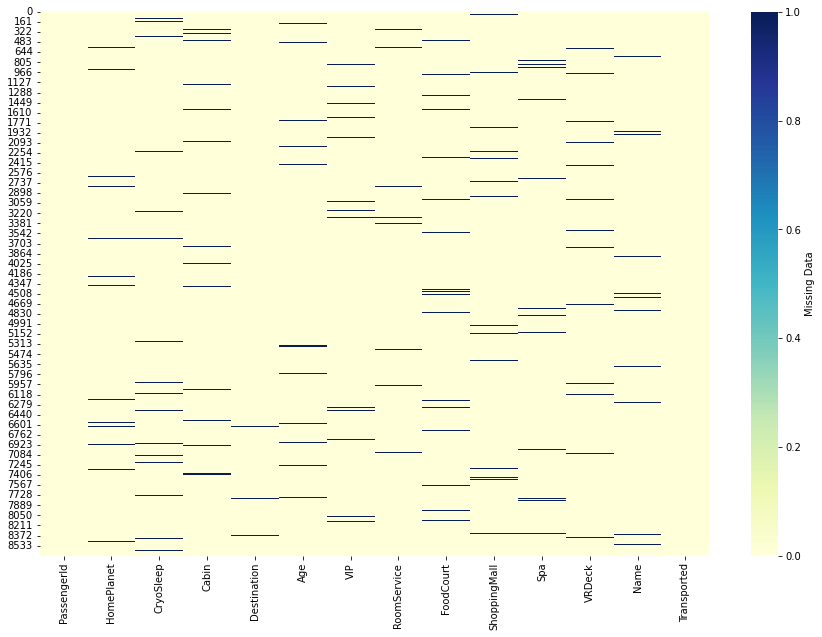

number of all null values in df columns

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


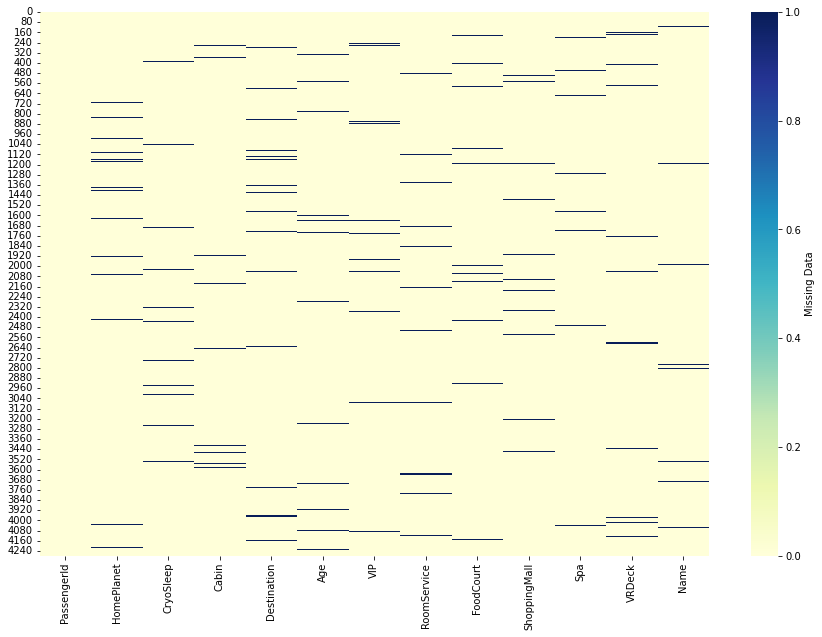

In [10]:
null_detector(df)
null_detector(test)

In [11]:
# drop duplicats
df.drop_duplicates(inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 959.3+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

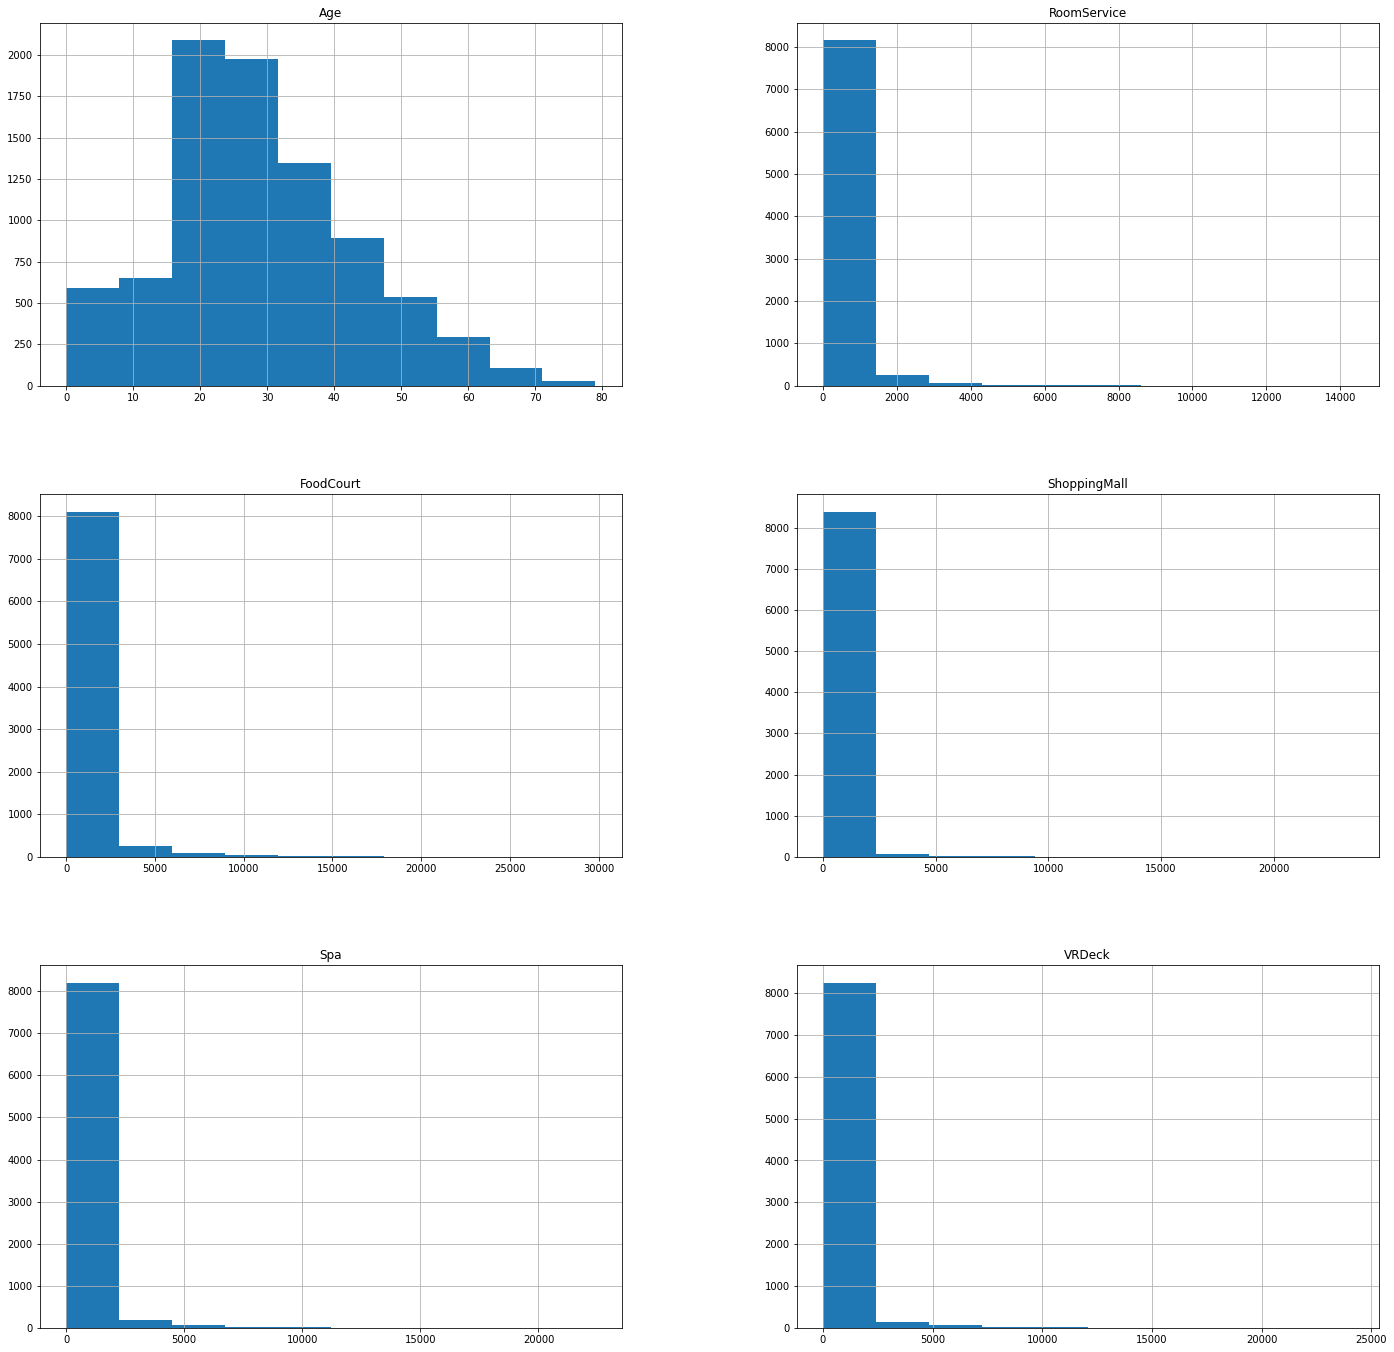

In [15]:
df[df.dtypes[(df.dtypes == "float64") |
             (df.dtypes == "int64")].index.values].hist(figsize=[24, 24])

<AxesSubplot:>

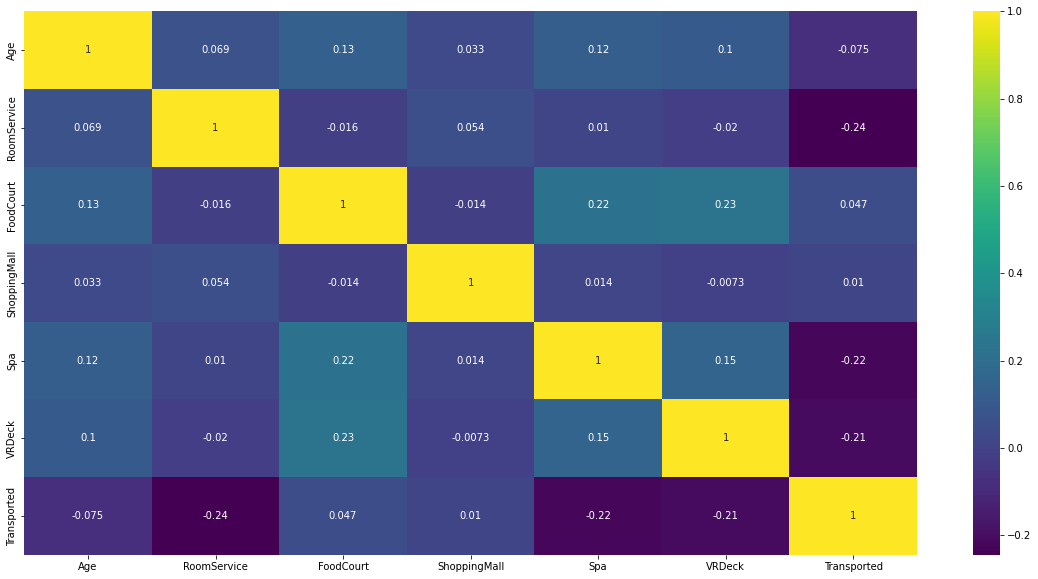

In [16]:
# Pearson correlation map
cols = df.corr().index
cm = df[cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, cmap='viridis')

In statistics, correlation or dependence is any statistical relationship between two variables. "correlation" may indicate any type of association, in statistics it refers to the degree to which a pair of variables are linearly related. We can only measure the numerical features.
The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement.

The two main types of correlation:
- positive correlation and
- negative correlation.

Positive correlation: A value 1.0 means perfect positive correlation, it's mean that increase in this feature lead in increase in another feature. i.e if we have features A, B and if feature A leads to increase in feature B, then they are positive correlated. If a value -1 that mean positive correlation

Negative correlation: A value -1.0 means perfect negative correlation, it's mean that decrease in this feature lead in increase in another feature. i.e if we have features A, B and if feature A leads to decrease in feature B, then they are negatively correlated. If a value -1 that mean negative correlation

If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.
A value 0.7 to 1 are strong positive correlation or perfectly correlated, so the increase in one leads to increase in the other
Generally speaking, a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity. So we looking for correlation <0.7. A value -0.7 to -1 also strong negative correlation or negative correlated indicates the presence of multi-collinearity.
This means that both the features are containing highly similar information is known as MultiColinearity when both of them contains almost the same information.

Also, a correlation near 0 may also be relevant, but it may be different from the correlation.

Pearson correlation
- The Pearson product-moment correlation coefficient (or Pearson correlation coefficient, for short) is a measure of the strength of a linear association between two variables and is denoted by r. Basically, a Pearson product-moment correlation attempts to draw a line of best fit through the data of two variables, and the Pearson correlation coefficient, r, indicates how far away all these data points are to this line of best fit (i.e., how well the data points fit this new model/line of best fit).

source:https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php


Kendall correlation
- It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities.

source:https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

Spearman correlation
- The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.

source:https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php


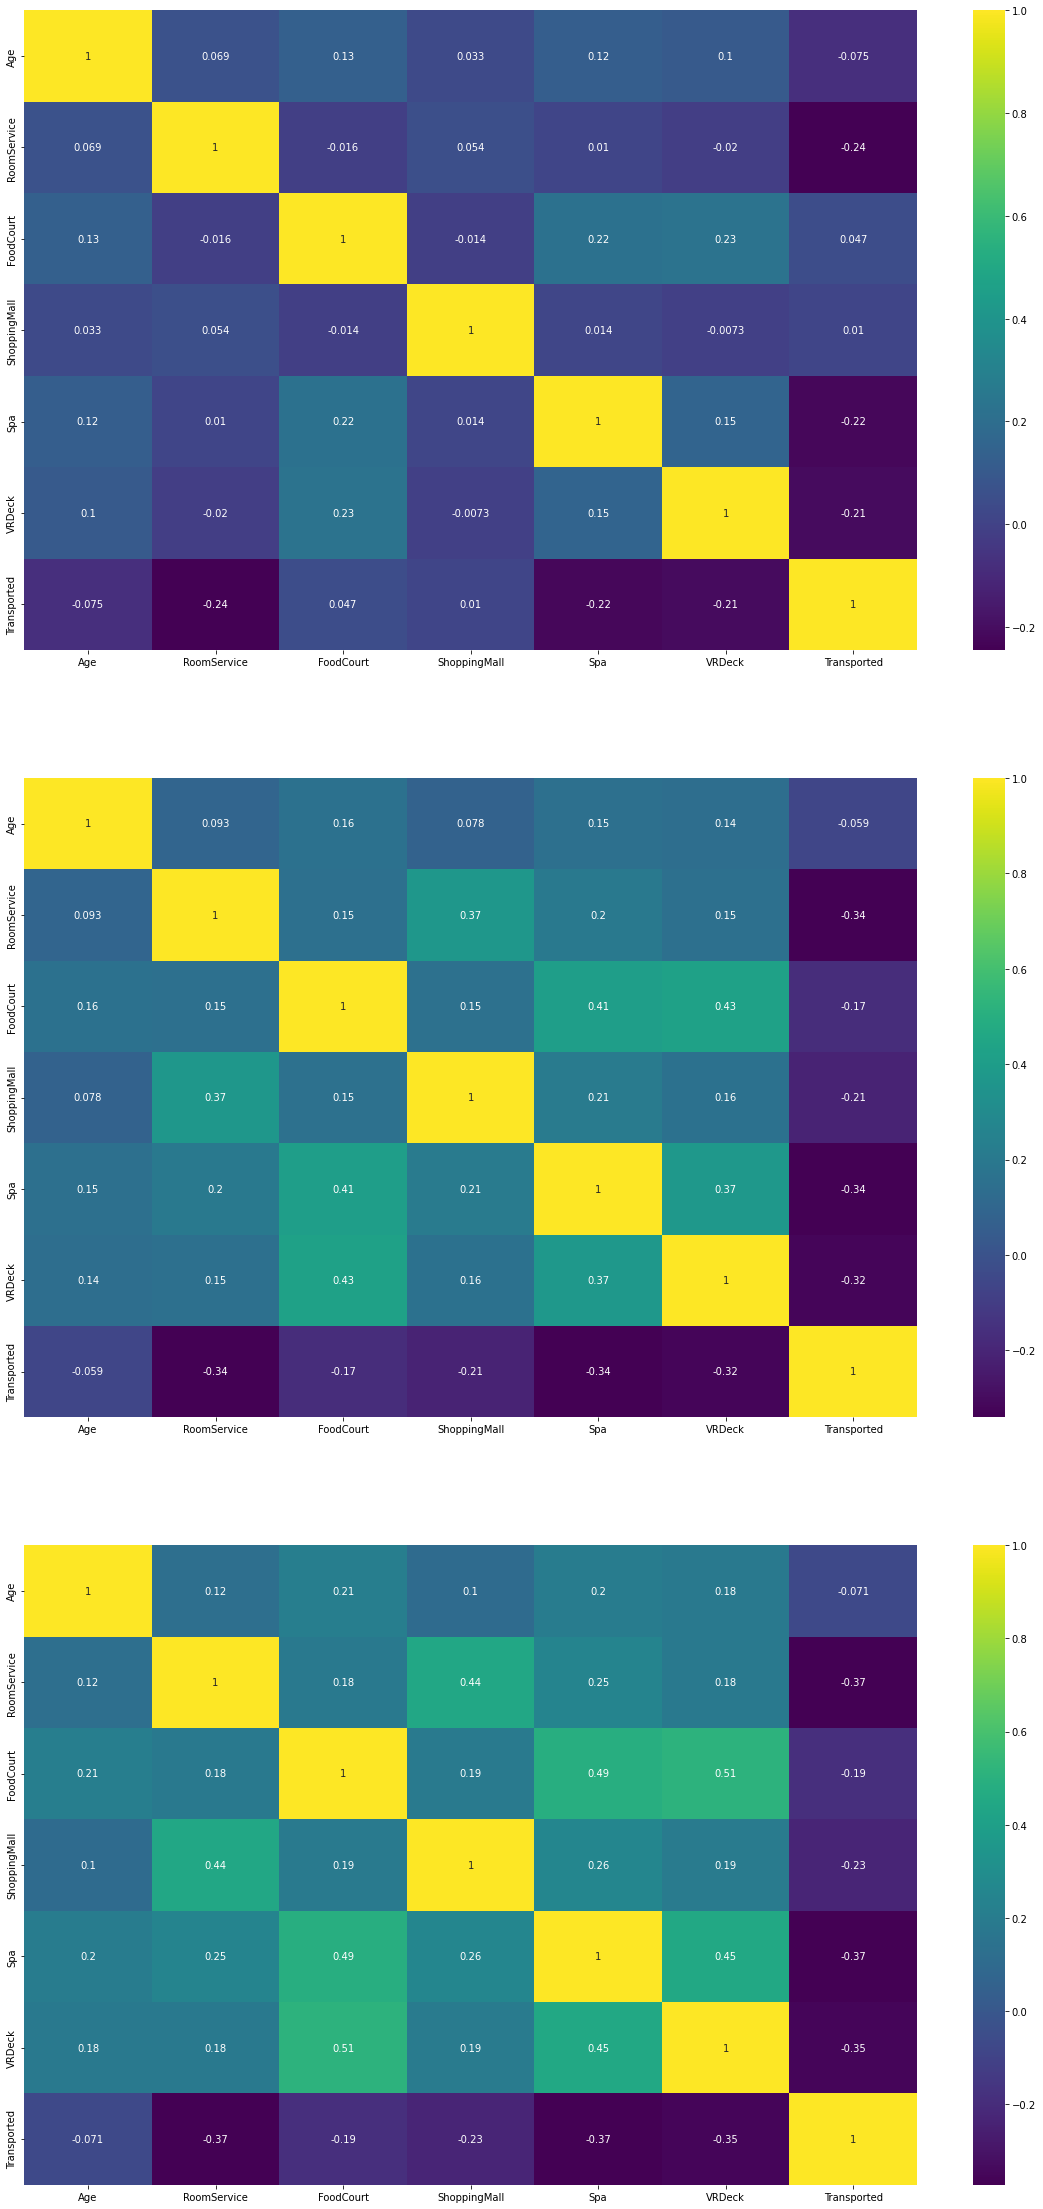

In [17]:
def correlation_map(df):
    fig, axs = plt.subplots(nrows=3, figsize=(20, 40))
    cols = df.corr().index
    # Pearson correlation map
    pearson = df[cols].corr(method='pearson')
    # Kendall correlation map
    kendall = df[cols].corr(method='kendall')
    # Spearman correlation map
    spearman = df[cols].corr(method='spearman')
    sns.heatmap(pearson, annot=True, cmap='viridis', ax=axs[0])
    sns.heatmap(kendall, annot=True, cmap='viridis', ax=axs[1])
    sns.heatmap(spearman, annot=True, cmap='viridis', ax=axs[2])


correlation_map(df)

We looking for relation between two variables. 
So we may observe all type of correlation map

### Box plot for searchin outliers

Plot boxplots to have a better understanding of the distribution of features. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. [https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51]


In [18]:
from IPython.display import Image
# from [https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51]
Image(url='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png', width=700)

- median (Q2/50th Percentile): the middle value of the dataset.

- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

- interquartile range (IQR): 25th to the 75th percentile.

- whiskers (shown in blue)

- outliers (shown as green circles)

- “maximum”: Q3 + 1.5*IQR

- “minimum”: Q1 -1.5*IQR

<AxesSubplot:>

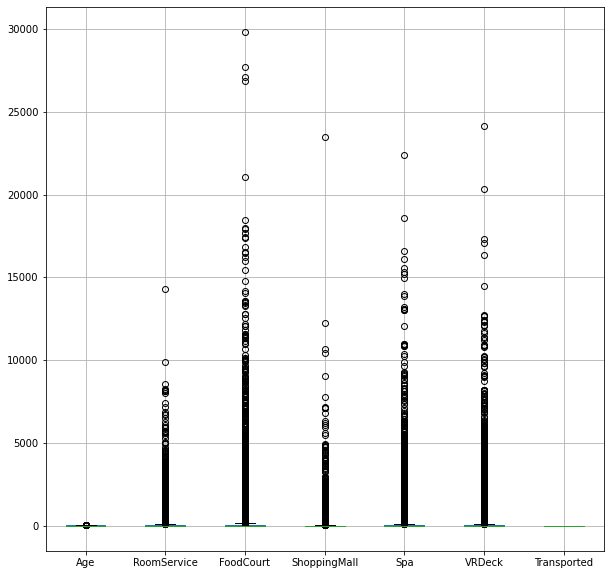

In [19]:
df.boxplot(figsize=(10, 10))

### Detect outliers

In [20]:
from collections import Counter
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns


def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) |
                              (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers


Outliers_to_drop = detect_outliers(df, numerical_features)

In [21]:
# Outlier shape
df.loc[Outliers_to_drop]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


### Drop outliers

In [22]:
# Need to understand your data to know if outliers should be removed.
# Drop outliers
df = df.drop(Outliers_to_drop, axis=0).reset_index(drop=True)

hmm IQR method is not that effective here

### check_freq

In [23]:
def check_freq(df=df, percent=0.05):
    # show all categorical data and their frequency, you can control percentage of category. Default = 5%
    df_object_type = df.select_dtypes(include=['object', 'category'])
    for col in df_object_type.columns:
        label_freq = df_object_type[col].value_counts() / len(df_object_type)
        fig = label_freq.sort_values(ascending=False).plot.bar()
        fig.axhline(y=percent, color='red')
        fig.set_ylabel(f'Percentage of destination category of {col}')
        fig.set_xlabel('Destination')
        fig.set_title(f'{col} rare categories')
        plt.show()

In [24]:
#check_freq(df = df, percent = 0.05)

# Feature engineering
Feature engineering is the process of using domain knowledge to choose and transform the variables that will feed into your machine learning model. The process involves a combination of understanding the problem, data analysis, and applying good judgement. Feature Engineering is as much an art as it is a science.

Feature engineering happens prior to modeling, and is an essential part of building a machine learning solution. Appropriate well-designed features are often the deciding factor of the performance of your final algorithm. For this reason, data scientists often spend 70%-80% of their time on the pre-modelling phase, which largely consists of feature engineering.[https://zindi.africa/learn/what-is-feature-engineering-a-tutorial-from-mohamed-salem-jedidi]

## Create new columns PasId_group and PasId_number

In [25]:
df[['PasId_group', 'PasId_number']] = df.PassengerId.str.split('_', expand=True)
test[['PasId_group', 'PasId_number']] = test.PassengerId.str.split('_', expand=True)

## Create new columns Cabin_deck, Cabin_num and PasId_number

In [26]:
df[['Cabin_deck', 'Cabin_num','Cabin_side']] = df.Cabin.str.split('/', expand=True)
test[['Cabin_deck', 'Cabin_num','Cabin_side']] = test.Cabin.str.split('/', expand=True)

## Create new columns Age_type

In [27]:
df['CategoricalAge'] =  pd.cut(df.Age, bins=4)

In [28]:
test['CategoricalAge'] =  pd.cut(df.Age, bins=4)

In [29]:
df['PasId_group'] = df['PasId_group'].astype('float64')
test['PasId_group'] = test['PasId_group'].astype('float64')

df['PasId_number'] = df['PasId_group'].astype('float64')
test['PasId_number'] = test['PasId_group'].astype('float64')

df['Cabin_num'] = df['Cabin_num'].astype('float64')
test['Cabin_num'] = test['Cabin_num'].astype('float64')

# Data split

In [30]:
X = df.copy(deep=True)
X = X.drop(['Transported','Name', 'PassengerId'], axis=1)
y = df.copy(deep=True)
y = y.Transported
# I hear boolean type better than the numerical type. Because computer can  understand it better
y = y.astype('bool')

In [31]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3)

train_index, val_index = next(iter(kf.split(X, y)))
X_train, X_test = X.iloc[train_index], X.iloc[val_index]
y_train, y_test = y.iloc[train_index], y.iloc[val_index]

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5795, 17), (2898, 17), (5795,), (2898,))

In [33]:
# Observe y_train we can see that data is very balanced that good
from collections import Counter
couter = Counter(y_train)
for k, v in couter.items():
    dist = v / len(y_train) * 100
    print(f'(Class={k}, n={v}, {dist}% )')

(Class=False, n=2876, 49.628990509059534% )
(Class=True, n=2919, 50.371009490940466% )


In [34]:
# Same here in y_test
from collections import Counter
couter = Counter(y_test)
for k, v in couter.items():
    dist = v / len(y_test) * 100
    print(f'(Class={k}, n={v}, {dist}% )')

(Class=False, n=1439, 49.65493443754313% )
(Class=True, n=1459, 50.34506556245687% )


Good data set very balanced

# Initiate classes

## DataFrameMapper

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class DataFramePreprocessing(TransformerMixin, BaseEstimator):
    '''DataFramePreprocessing class fit and transform all feature and return Pandas Dataframe'''
    def __init__(self):
        pass

    # Find all categorical features. Find features with <= 7 unique value
    def categorical_features(self):
        return [
            col for col in X.select_dtypes(include=['object']).columns
            if len(X[col].unique()) <= 7
        ]

    # Find all ordinal features. Find features with > 7 unique value
    def ordinal_features(self):
        return [
            col for col in X.select_dtypes(include=['object']).columns
            if len(X[col].unique()) > 7
        ]

    # Find all numerical features.
    def numerical_features(self):
        return X.select_dtypes(include=['int64', 'float64']).columns

    # Find all boolean features.
    def boolean_features(self):
        return X.select_dtypes(include=['bool']).columns

    # Use SimpleImputer, RareLabelEncoder, and  OneHotEncoder for all categorical features.
    # The RareLabelEncoder() groups rare or infrequent categories in
    # a new category called "Rare", or any other name entered by the user. By default 5%
    def cat(self):
        return [([c], [
            SimpleImputer(strategy='most_frequent'),
            RareLabelEncoder(),
            OneHotEncoder(sparse=False, handle_unknown='ignore')
        ]) for c in self.categorical_features()]

    # Use SimpleImputer and OrdinalEncoder for all ordinal features
    def ordin(self):
        from sklearn.preprocessing import OrdinalEncoder
        return [([o], [
            SimpleImputer(strategy='most_frequent'),
            OrdinalEncoder(handle_unknown="use_encoded_value",
                           unknown_value=-999)
        ]) for o in self.ordinal_features()]

    # Use SimpleImputer and OneHotEncoder for all boolean features
    def boolean(self):
        return [([b], [
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(sparse=False, handle_unknown='error')
        ]) for b in self.boolean_features()]

    # Use IterativeImputer some times better than the SimpleImputer and StandardScaler for all numerical features
    def num(self):
        from sklearn.preprocessing import MinMaxScaler
        return [([n], [
            IterativeImputer(IsolationForest(n_estimators=100,
                            max_samples='auto',
                            max_features=1.0,
                            bootstrap=False,
                            n_jobs=-1,
                            random_state=0,
                            verbose=0,
                            contamination=0.3
                           ),initial_strategy ='median'),
            StandardScaler(with_mean=False, with_std=True)
        ]) for n in self.numerical_features()]

    # Mapper transform all feature and return Pandas DataFrame
    def mapper(self):
        from sklearn_pandas import DataFrameMapper
        return DataFrameMapper(self.num() + self.ordin() + self.cat() +
                               self.boolean(),
                               df_out=True)

    # Fit
    def fit(self, X, y=None):
        # Standart fitter, recomended use Pandas DataFrame
        X = check_array(X, accept_sparse=False)

        self.n_features_in_ = X.shape[1]
        self.n_features_ = X.shape[1]
        self.is_fitted_ = True

        return self

    # Transform
    def transform(self, X):
        # Standart transform
        check_is_fitted(self, ['is_fitted_'])

        X = check_array(X, accept_sparse=True)

        if X.shape[1] != self.n_features_:
            raise ValueError(
                'Shape of input is different from what was seen in `fit`')
        return self

## outlier_rejection

In [36]:
#source https://imbalanced-learn.org/stable/auto_examples/applications/plot_outlier_rejections.html
from sklearn.ensemble import IsolationForest

def outlier_rejection(X, y):
    """This function for outliers and anomaly"""
    model = IsolationForest(n_estimators=100,
                            max_samples='auto',
                            max_features=1.0,
                            bootstrap=False,
                            n_jobs=-1,
                            random_state=0,
                            verbose=0,
                            contamination=0.01
                           ) #1% of data that IsolationForest think as outliers
    model.fit(X)
    y_pred = model.predict(X)
    return X[y_pred == 1], y[y_pred == 1]

## CustomClassifiere

In [37]:
from imblearn import FunctionSampler
from sklearn.experimental import enable_halving_search_cv
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_array, check_is_fitted
from imblearn.pipeline import Pipeline
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn import FunctionSampler
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, f_oneway, mutual_info_classif
from sklearn.ensemble import BaggingClassifier
from feature_engine.selection import DropCorrelatedFeatures


class CustomClassifier(ClassifierMixin, BaseEstimator):
    '''CustomClassifier update to outliers and anomaly
    Custom Classifier have 1 goal give a good pipeline with hyperparameters tuning.
    Hyperparameters to tune as a part of the fit() function and not the constructor.
    Template from https://learn-scikit.oneoffcoder.com/customized-estimators.html'''
    
    param_grid = None

    def __init__(self, base_estimator, scaler=None):
        # base_estimator model
        self.base_estimator = base_estimator
        self.scaler = scaler

    def set_base_estimator(self, base_estimator):
        self.base_estimator = base_estimator
        return self

    def __get_pipeline(self):
        scal = self.scaler
        classifier = self.base_estimator
        
        steps = ([
            ('scaler', scal), #My CustomTransformer DataFrame. 
            ('outliers',FunctionSampler(func=outlier_rejection)), # search anomaly and outliers
            ('smote', SMOTE(random_state=0, n_jobs=-1)), #this data is very balanced but SMOTE improves accuracy so why not
            ('drop', DropCorrelatedFeatures()), #good stuff find correlated features and drop them. and can be tuned.
            #Remember correlated features not always bad.
            ('select', SelectPercentile()), # I check all feature selectors from sklearn and this is my favorit
            ('model',
             BaggingClassifier(
                 base_estimator=classifier,
                 bootstrap_features=True,
                 n_jobs=-1,
                 random_state=0,
             )),
        ])

        pipeline = Pipeline(steps=steps)
        return pipeline

    def __get_model(self):
        if self.param_grid is None:
            return self.__get_pipeline()
        model = HalvingGridSearchCV(
            **{
                'estimator': self.__get_pipeline(),
                'cv': self.cv,
                'param_grid': self.param_grid,
                'scoring': 'neg_brier_score',
                'n_jobs': -1,
                'random_state': 0,
                'factor': 2,
            })
        return model

    def predict_proba(self, X):
        check_is_fitted(self, 'is_fitted_')

        return self.model_.predict_proba(X)

    def set_param_grid(self, param_grid=None):
        self.param_grid = param_grid
        return self

    def set_cv(self, cv=5):
        self.cv = cv
        return self

    def set_scaler(self, scaler):
        self.scaler = scaler
        return self.scaler

    def fit(self, X, y, *args, **kwargs):
        if y is None:
            raise ValueError(
                'requires y to be passed, but the target y is None')

        self.is_fitted_ = True
        self.n_features_in_ = X.shape[1]

        self.model_ = self.__get_model()

        self.model_.fit(X, y)

        return self

    def predict(self, X):
        check_is_fitted(self, 'is_fitted_')
        X = check_array(X)

        return self.model_.predict(X)

# Param Grid

In [38]:
# Here you can use anything that you want to tune
# lgbm_param_grid = {
#     'select__percentile': np.arange(2, 45, 1),
#     'smote__k_neighbors': np.arange(5, 13, 1),
#     # Belong to BaggingClassifier
#     'model__n_estimators': np.arange(20, 31, 1),
#     # Belong to LGBMClassifier
#     'model__base_estimator__max_depth': np.arange(5, 13, 1),
# }

In [39]:
lgbm_param_grid = {
    #'select__percentile': [46],
    'select__percentile': [65],
    'smote__k_neighbors': [7],
    'drop__threshold':[0.9],
    # Belong to BaggingClassifier
    'model__n_estimators': [148],
    #'model__max_samples': [0.90],
    'model__max_samples': [0.12],
    #'model__max_features': np.arange(0.1, 0.7, 0.05),
    # Belong to LGBMClassifier
    #'model__base_estimator__max_depth': [7],
    #'model__base_estimator__learning_rate': np.arange(0.01, 0.31, 0.05)
}

In [40]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report


def evaluate(estimator, X_train, y_train, X_test, y_test):

    # Accuracy for X_train and y_train
    score_train = estimator.score(X_train, y_train)
    print(f'(Accuracy for score(X_train,y_train) {score_train})\n')

    # Accuracy for X_test and y_test

    score_test = estimator.score(X_test, y_test)
    print(f'(Accuracy for score(X_test,y_test) {score_test})\n')

    # Prediction on Testing Data
    y_pred = estimator.predict(X_test)

    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")

    # Accuracy for y_test and y_pred
    classifier_accuracy_score = balanced_accuracy_score(y_test, y_pred)
    print("Balanced Accuracy Score:\n", classifier_accuracy_score, "\n")

    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")

    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")

In [41]:
from sklearn.metrics import precision_recall_curve, roc_curve


def visual(estimator, X_test, y_test):
    # Precision - Recall Curve
    yhat = estimator.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
    plt.figure(dpi=100, figsize=(15, 6))
    plt.subplot(121)
    sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
    sns.lineplot(recall, precision, marker='.', label='skill')
    plt.title("Recall vs Precision Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # ROC Curve
    plt.subplot(122)
    sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
    sns.lineplot(fpr, tpr, marker='.', label='Skill')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Calibrate curve
    plt.subplot()
    from sklearn.calibration import calibration_curve
    sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fop, mpv = calibration_curve(y_test, yhat[:, 1], n_bins=10)
    sns.lineplot(fop, mpv, marker='.', label='Skill')
    plt.title("Calibrate curve")
    plt.legend()
    plt.show()

In the context of binary classification, calibration refers to the process of transforming the output scores from a binary classifier to class probabilities. If we think of the classifier as a “black box” that transforms input data into a score, we can think of calibration as a post-processing step that converts the score into a probability of the observation belonging to class 1.

source: https://statisticaloddsandends.wordpress.com/2020/10/07/what-is-calibration/

In [42]:
from IPython.display import Image

Image(
    url=
    'https://statisticaloddsandends.files.wordpress.com/2020/10/pipeline.png?w=768&h=86',
    width=700)

In [43]:
from sklearn.calibration import CalibratedClassifierCV


def calibration(estimator, X_train, y_train, method='sigmoid'):
    calibration = CalibratedClassifierCV(base_estimator=estimator.model_,
                                         n_jobs=-1,
                                         cv='prefit',
                                         method=method)
    calibration.fit(X_train, y_train)
    return calibration

In [44]:
def brier_score(estimator, X_test, y_test):
    from sklearn.metrics import brier_score_loss
    yhat = estimator.predict_proba(X_test)
    print(f'brier_score_loss = {brier_score_loss(y_test, yhat[:, 1])}')

In [45]:
def full_evaluate(estimator, X_train, y_train, X_test, y_test):
    evaluate(estimator, X_train, y_train, X_test, y_test)
    brier_score(estimator, X_test, y_test)
    visual(estimator, X_test, y_test)

# Modeling

In [46]:
def modeling(estimator, param_grid=None):
    estimator = CustomClassifier(estimator)
    if param_grid == None:
        pass
    else:
        estimator.set_param_grid(param_grid)

    estimator.set_scaler(DataFramePreprocessing().mapper())

    estimator.set_cv(cv=kf)
    return estimator

In [47]:
def full_evaluate_fit(estimator):
    estimator.fit(X_train, y_train)
    try:
        print(estimator.model_.best_params_)
    except:
        pass
    cal = calibration(estimator, X_train, y_train, method='isotonic')
    cal_sig = calibration(estimator, X_train, y_train)
    print('full_evaluate(estimator.model_)')
    full_evaluate(estimator.model_, X_train, y_train, X_test, y_test)
    print('full_evaluate(cal)')
    full_evaluate(cal, X_train, y_train, X_test, y_test)
    print('full_evaluate(cal_sig)')
    full_evaluate(cal_sig, X_train, y_train, X_test, y_test)
    return estimator.model_, cal, cal_sig

In [48]:
estimator = modeling(
    LGBMClassifier(
        boosting_type='dart',
        n_jobs=-1,
        random_state=0,
        class_weight= 'balanced'
    ), lgbm_param_grid)

In [49]:
mapper = DataFramePreprocessing().mapper()

X_train_mapped= mapper.fit_transform(X_train)
X_train_mapped

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PasId_group,PasId_number,Cabin_num,Cabin,...,HomePlanet_x0_Mars,CryoSleep_x0_False,CryoSleep_x0_True,Destination_x0_55 Cancri e,Destination_x0_PSO J318.5-22,Destination_x0_TRAPPIST-1e,VIP_x0_False,VIP_x0_True,Cabin_side_x0_P,Cabin_side_x0_S
2683,2.757352,3.137405,0.000000,0.035480,0.000000,0.000000,1.607473,1.607473,0.386452,946.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2685,2.969456,0.255182,0.425365,0.000000,0.000000,0.018873,1.609151,1.609151,0.908361,3709.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2686,2.545248,0.616566,0.025937,0.010798,0.305122,0.000000,1.609711,1.609711,1.179275,2582.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2688,2.262442,0.000000,0.000000,0.000000,0.000000,0.000000,1.611389,1.611389,0.932265,3717.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2689,0.424208,0.000000,0.000000,0.000000,0.000000,0.000000,1.611949,1.611949,0.910353,3710.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.898754,0.000000,4.421594,0.000000,1.483181,0.060722,5.190016,5.190016,0.195218,99.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8689,1.272624,0.000000,0.000000,0.000000,0.000000,0.000000,5.191135,5.191135,2.986036,3701.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8690,1.838235,0.000000,0.000000,2.887731,0.000903,0.000000,5.191695,5.191695,2.988028,3703.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8691,2.262442,0.000000,0.680195,0.000000,0.318663,2.654545,5.192254,5.192254,1.211148,1464.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
vf,gf = outlier_rejection(X_train_mapped,y_train)
vf.shape

(5737, 23)

In [51]:
#raise()

# Evaluate

{'drop__threshold': 0.9, 'model__max_samples': 0.12, 'model__n_estimators': 148, 'select__percentile': 65, 'smote__k_neighbors': 7}
full_evaluate(estimator.model_)
(Accuracy for score(X_train,y_train) -0.1258944455930822)

(Accuracy for score(X_test,y_test) -0.16452302748063924)

Accuracy Score:
 0.7401656314699793 

Balanced Accuracy Score:
 0.7407700686972761 

Confusion Matrix:
 [[1192  247]
 [ 506  953]] 

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.83      0.76      1439
        True       0.79      0.65      0.72      1459

    accuracy                           0.74      2898
   macro avg       0.75      0.74      0.74      2898
weighted avg       0.75      0.74      0.74      2898
 

brier_score_loss = 0.16452302748063924


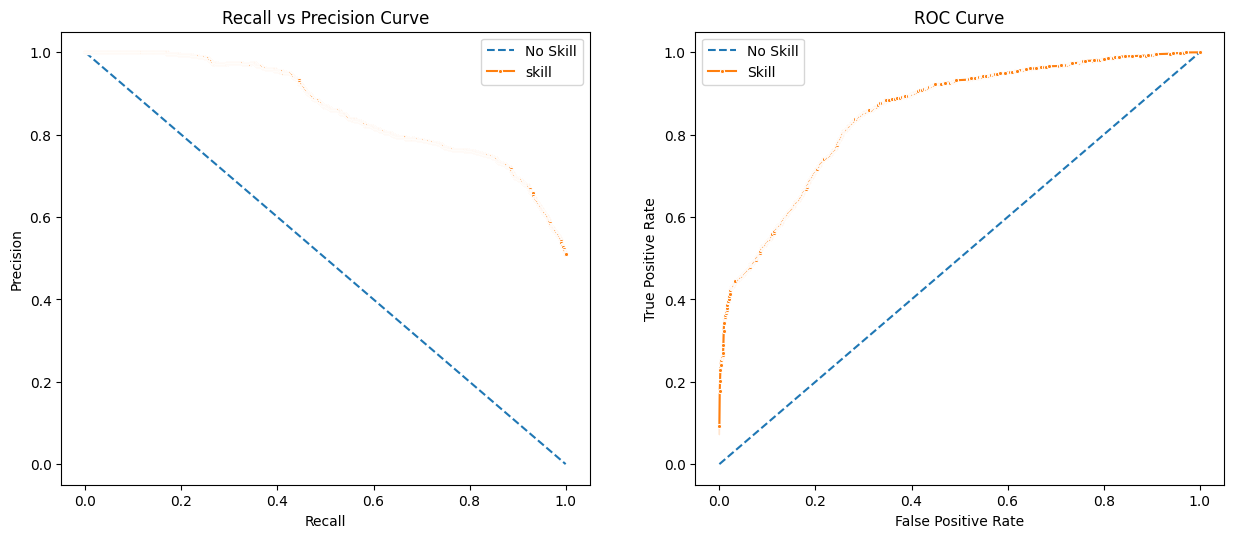

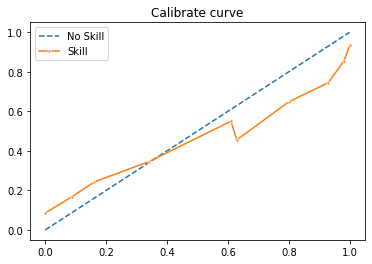

full_evaluate(cal)
(Accuracy for score(X_train,y_train) 0.8320966350301985)

(Accuracy for score(X_test,y_test) 0.777087646652864)

Accuracy Score:
 0.777087646652864 

Balanced Accuracy Score:
 0.7767340906243911 

Confusion Matrix:
 [[1044  395]
 [ 251 1208]] 

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.73      0.76      1439
        True       0.75      0.83      0.79      1459

    accuracy                           0.78      2898
   macro avg       0.78      0.78      0.78      2898
weighted avg       0.78      0.78      0.78      2898
 

brier_score_loss = 0.15643717363792572


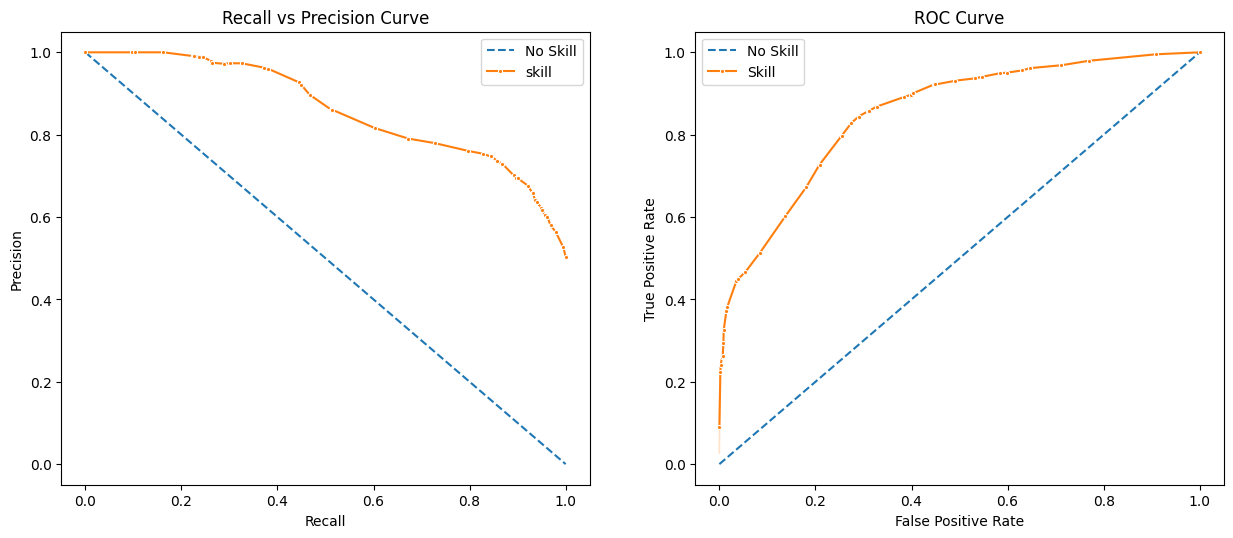

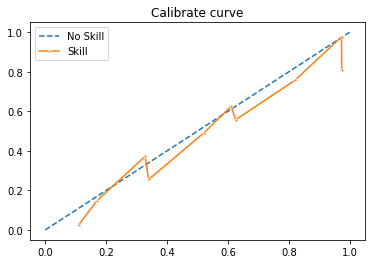

full_evaluate(cal_sig)
(Accuracy for score(X_train,y_train) 0.8277825711820535)

(Accuracy for score(X_test,y_test) 0.756383712905452)

Accuracy Score:
 0.756383712905452 

Balanced Accuracy Score:
 0.7566912328215133 

Confusion Matrix:
 [[1153  286]
 [ 420 1039]] 

Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.80      0.77      1439
        True       0.78      0.71      0.75      1459

    accuracy                           0.76      2898
   macro avg       0.76      0.76      0.76      2898
weighted avg       0.76      0.76      0.76      2898
 

brier_score_loss = 0.1596970003251069


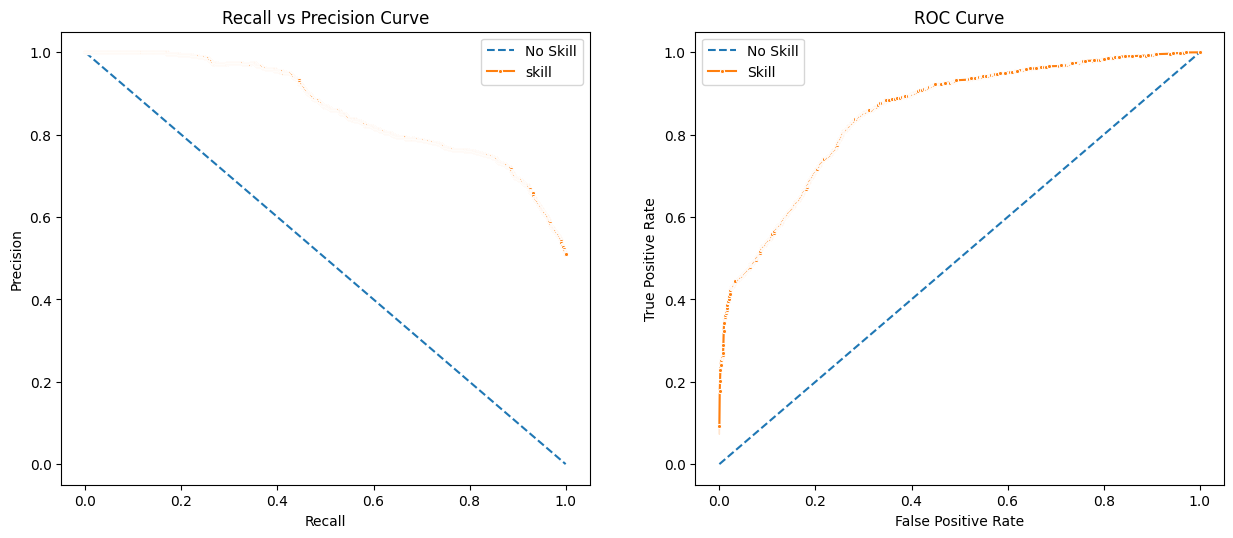

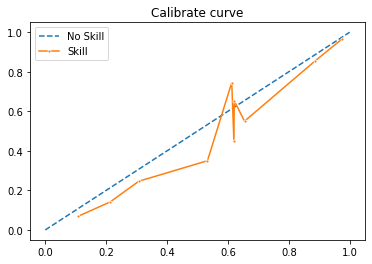

In [52]:
model, model_calib, model_calib_sig = full_evaluate_fit(estimator)

In [53]:
sub = pd.read_csv('sample_submission.csv')
y_preds = model_calib.predict(test)
sub['Transported'] = y_preds
sub.to_csv('submission.csv', index=False)

In [54]:
# model_calib why i always use it? calibration with method='isotonic'. In my experience, almost always better than Sigmoid.

Text(0.5, 1.0, 'Prediction distribution')

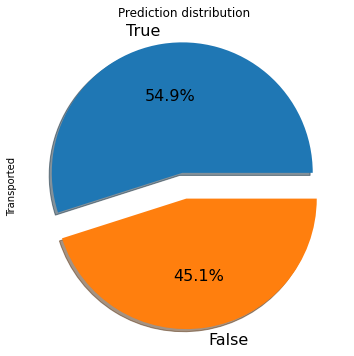

In [55]:
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [56]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)